# **Parkinson's Disease Detection and prediction with LSTM-Driven Analysis and Genetic ALgorithm optimization**


In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv('/content/pd_EEG_features.csv')

# Separate features and target variable
X = data.drop(columns=['id', 'gender', 'class'])
y = data['class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Define the LSTM model
model = Sequential()

# Add LSTM layers
model.add(LSTM(128, input_shape=(X_train_scaled.shape[1], 1), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(64, return_sequences=False))
model.add(Dropout(0.2))

# Add dense layers
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Reshape the input data for LSTM
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [10]:
# Train the model
history = model.fit(X_train_reshaped, y_train, epochs=20, batch_size=32, validation_data=(X_test_reshaped, y_test))

Epoch 1/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 31s 2s/step - accuracy: 0.7984 - loss: 0.4813 - val_accuracy: 0.8026 - val_loss: 0.4585
Epoch 2/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 38s 2s/step - accuracy: 0.8095 - loss: 0.4327 - val_accuracy: 0.8092 - val_loss: 0.4565
Epoch 3/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 29s 2s/step - accuracy: 0.7812 - loss: 0.4777 - val_accuracy: 0.8158 - val_loss: 0.4479
Epoch 4/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.8203 - loss: 0.4281 - val_accuracy: 0.7895 - val_loss: 0.4650
Epoch 5/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.8002 - loss: 0.4452 - val_accuracy: 0.8026 - val_loss: 0.4505
Epoch 6/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.8078 - loss: 0.4199 - val_accuracy: 0.8158 - val_loss: 0.4604
Epoch 7/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 0.8119 - loss: 0.4260 - val_accuracy: 0.7961 - val_loss: 0.4617
Epoch 8/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.8220 - loss: 0.3950 - val_accuracy: 0.7961 - val_loss:

In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test_reshaped, y_test)
print(f'Test Accuracy: {accuracy:.4f}')

5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 941ms/step - accuracy: 0.8309 - loss: 0.4282
Test Accuracy: 0.8026


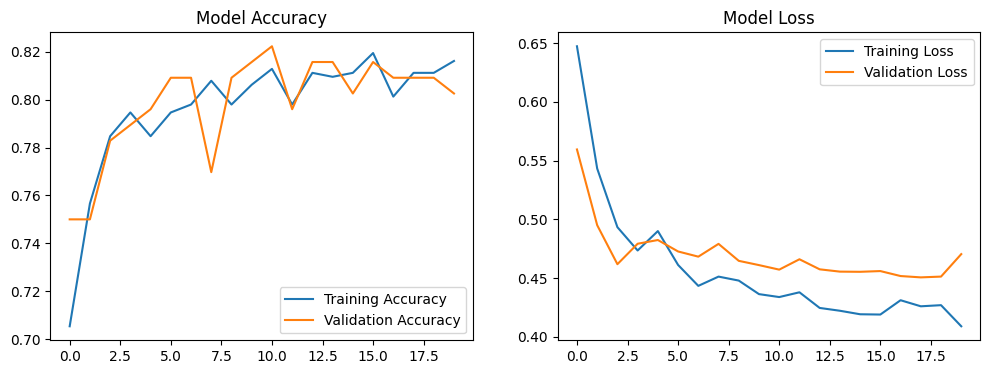

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='best')
plt.title('Model Accuracy')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='best')
plt.title('Model Loss')

plt.show()

In [ ]:
def predict_parkinsons(new_data):
    # Scale the new data
    new_data_scaled = scaler.transform(new_data)

    # Reshape the new data for LSTM
    new_data_reshaped = new_data_scaled.reshape((new_data_scaled.shape[0], new_data_scaled.shape[1], 1))

    # Make predictions
    predictions = model.predict(new_data_reshaped)

    # Convert probabilities to binary predictions
    predicted_classes = (predictions > 0.5).astype(int)

    return predicted_classes

# Example usage
new_data = pd.DataFrame({
    'PPE': [0.85247],
    'EEG': [0.71826],
    'RPDE': [0.57227],
    # Add other feature values here
})

predicted_class = predict_parkinsons(new_data)
print(f'Predicted Class: {predicted_class[0][0]}')

In [ ]:
def predict_parkinsons(new_data):
    # Get the feature names used during training
    feature_names = X_train.columns

    # Ensure new_data has the same features and order
    new_data = new_data.reindex(columns=feature_names, fill_value=0)  # Fill missing values with 0

    # Scale the new data
    new_data_scaled = scaler.transform(new_data)

    # Reshape the new data for LSTM
    new_data_reshaped = new_data_scaled.reshape((new_data_scaled.shape[0], new_data_scaled.shape[1], 1))

    # Make predictions
    predictions = model.predict(new_data_reshaped)

    # Convert probabilities to binary predictions
    predicted_classes = (predictions > 0.5).astype(int)

    return predicted_classes

# Example usage
new_data = pd.DataFrame({
    'PPE': [0.85247],
    'EEG': [0.71826],
    'RPDE': [0.57227],
    # Add other feature values here
})

predicted_class = predict_parkinsons(new_data)
print(f'Predicted Class: {predicted_class[0][0]}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Predicted Class: 1


5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 727ms/step


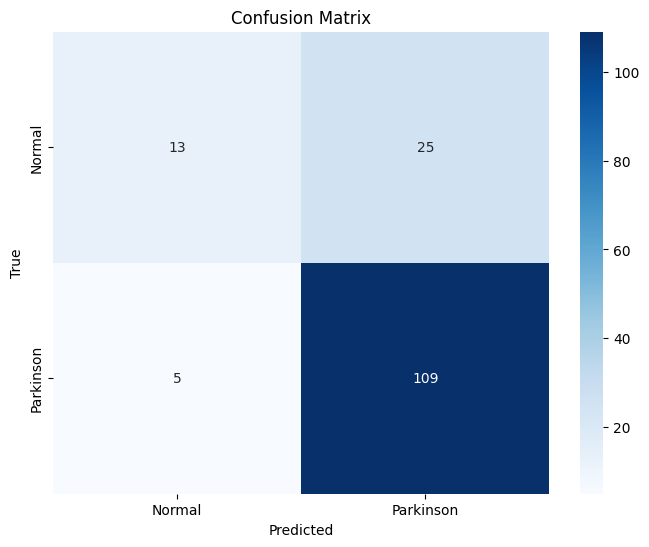

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



# Step 1: Make predictions
y_pred = model.predict(X_test_reshaped)
y_pred_classes = (y_pred > 0.5).astype(int)

# Step 2: Compute the confusion matrix
confusion_matrix = tf.math.confusion_matrix(y_test, y_pred_classes).numpy()

# Step 3: Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Parkinson'], yticklabels=['Normal', 'Parkinson'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step


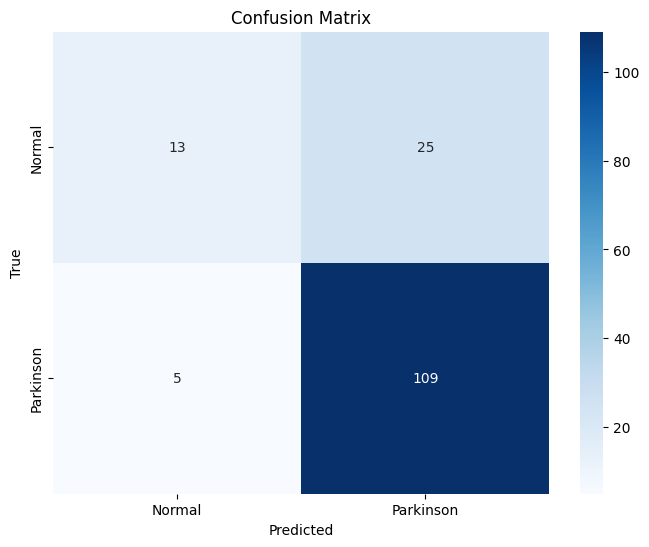

In [ ]:


# Step 1: Make predictions (already done in the provided code)
y_pred = model.predict(X_test_reshaped)
y_pred_classes = (y_pred > 0.5).astype(int)

# Step 2: Compute the confusion matrix (already done in the provided code)
confusion_matrix = tf.math.confusion_matrix(y_test, y_pred_classes).numpy()

# Step 3: Plot the heatmap (already done in the provided code)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Parkinson'], yticklabels=['Normal', 'Parkinson'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:

df = pd.read_csv('/content/pd_EEG_features.csv')

In [3]:
correlation_matrix = df.corr()

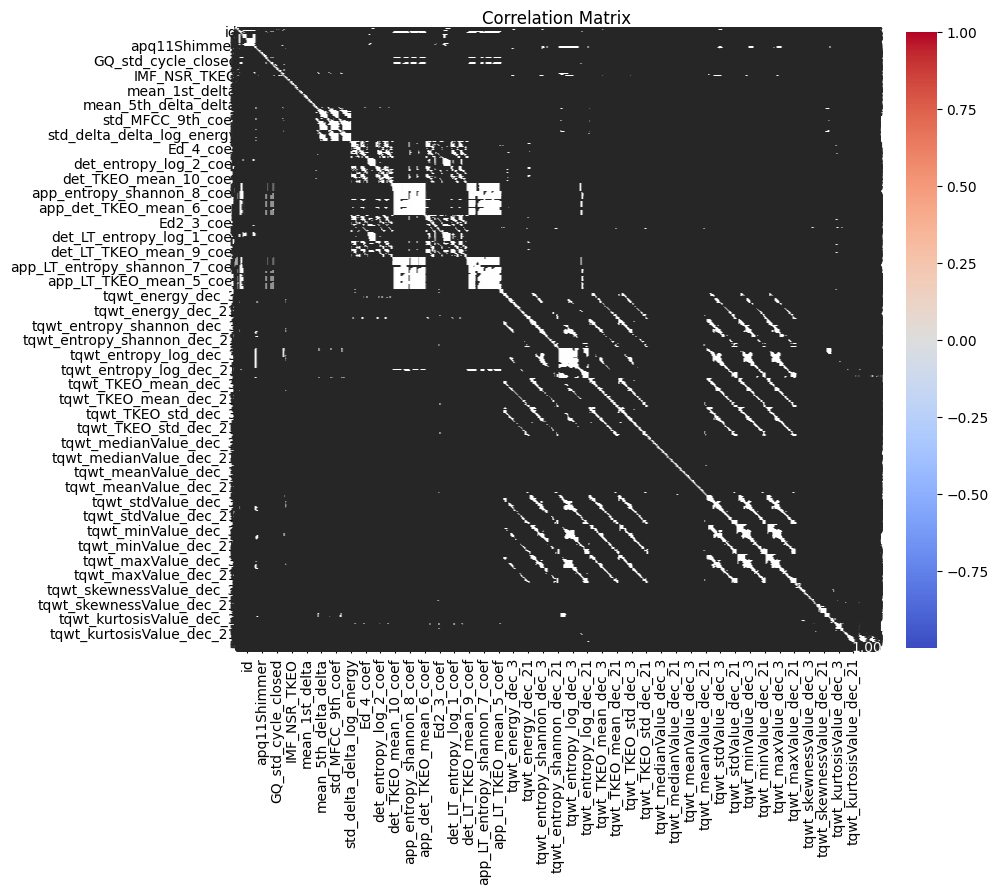

In [4]:
plt.figure(figsize=(10, 8))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()